In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# === 1. Load Data ===
df = pd.read_csv("work-accidents-in-turkey.csv")

In [4]:
# === 2. Rename Columns ===
rename_dict = {
    "İl": "Province",
    "İş Kazası (Erkek)": "Work_Accident_Male",
    "İş Kazası (Kadın)": "Work_Accident_Female",
    "Meslek Hastalığı (Erkek)": "Occupational_Disease_Male",
    "Meslek Hastalığı (Kadın)": "Occupational_Disease_Female",
    "İş Kazası Ölümü (Erkek)": "Fatality_Accident_Male",
    "İş Kazası Ölümü (Kadın)": "Fatality_Accident_Female",
    "Meslek Hastalığı Ölümü (Erkek)": "Fatality_Disease_Male",
    "Meslek Hastalığı Ölümü (Kadın)": "Fatality_Disease_Female",
    "Yıl": "Year"
}
df = df.rename(columns=rename_dict)

In [5]:
# === 3. Add Totals ===
df["Total_Work_Accidents"] = df["Work_Accident_Male"] + df["Work_Accident_Female"]
df["Total_Occupational_Diseases"] = df["Occupational_Disease_Male"] + df["Occupational_Disease_Female"]
df["Total_Fatalities_Accidents"] = df["Fatality_Accident_Male"] + df["Fatality_Accident_Female"]
df["Total_Fatalities_Diseases"] = df["Fatality_Disease_Male"] + df["Fatality_Disease_Female"]

In [6]:
# === 4. Save Renamed CSV ===
df.to_csv("work_accidents_renamed.csv", index=False)

In [7]:
# === 5. Create folder for charts ===
output_dir = "visuals"
os.makedirs(output_dir, exist_ok=True)

In [18]:
# === Helper: Get Top 15 Provinces ===
def top_n(df, col, n=15):
    return df.sort_values(col, ascending=False).head(n)

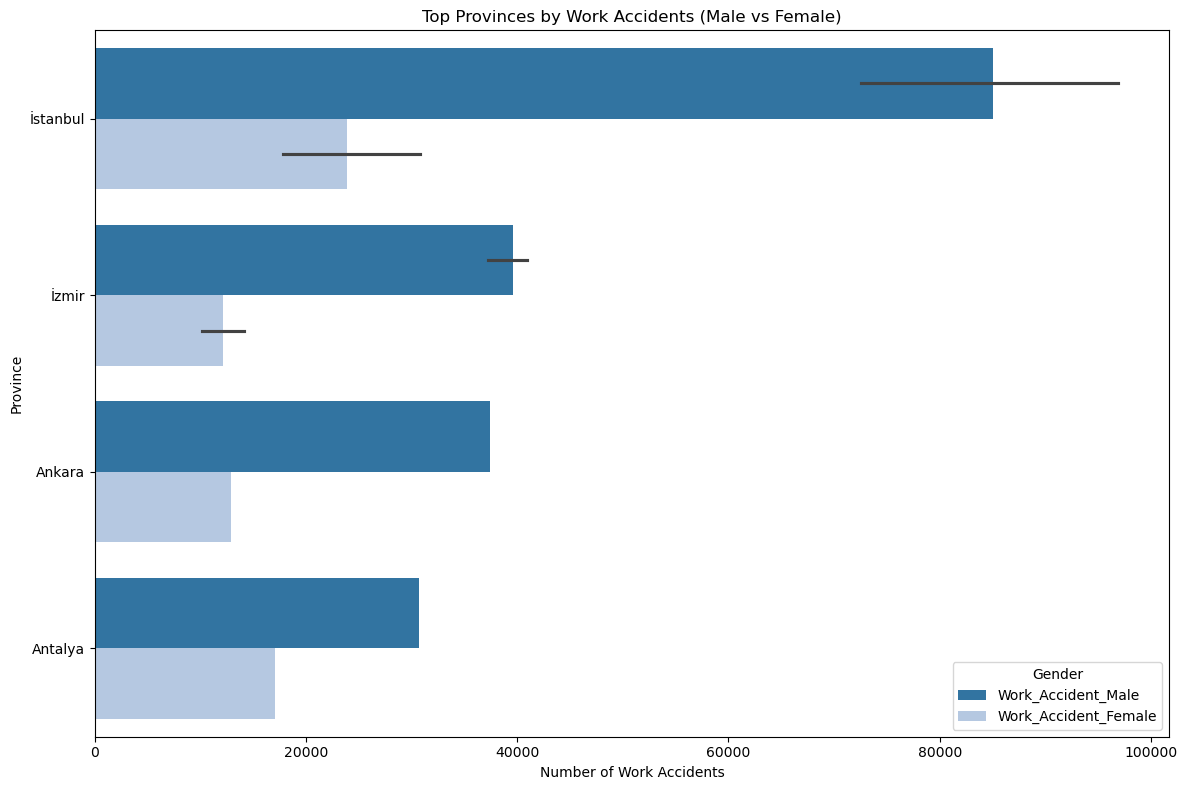

In [25]:
df_top = top_n(df, "Total_Work_Accidents", 15)
df_plot = df_top.melt(id_vars="Province", value_vars=["Work_Accident_Male","Work_Accident_Female"],
                  var_name="Gender", value_name="Accidents")
plt.figure(figsize=(12,8))
sns.barplot(data=df_plot, x="Accidents", y="Province", hue="Gender",
            palette=["#1f77b4","#aec7e8"])
plt.title("Top Provinces by Work Accidents (Male vs Female)")
plt.xlabel("Number of Work Accidents")
plt.ylabel("Province")
plt.tight_layout()
plt.savefig(os.path.join(output_dir,"page1_overview.png"))
plt.show()

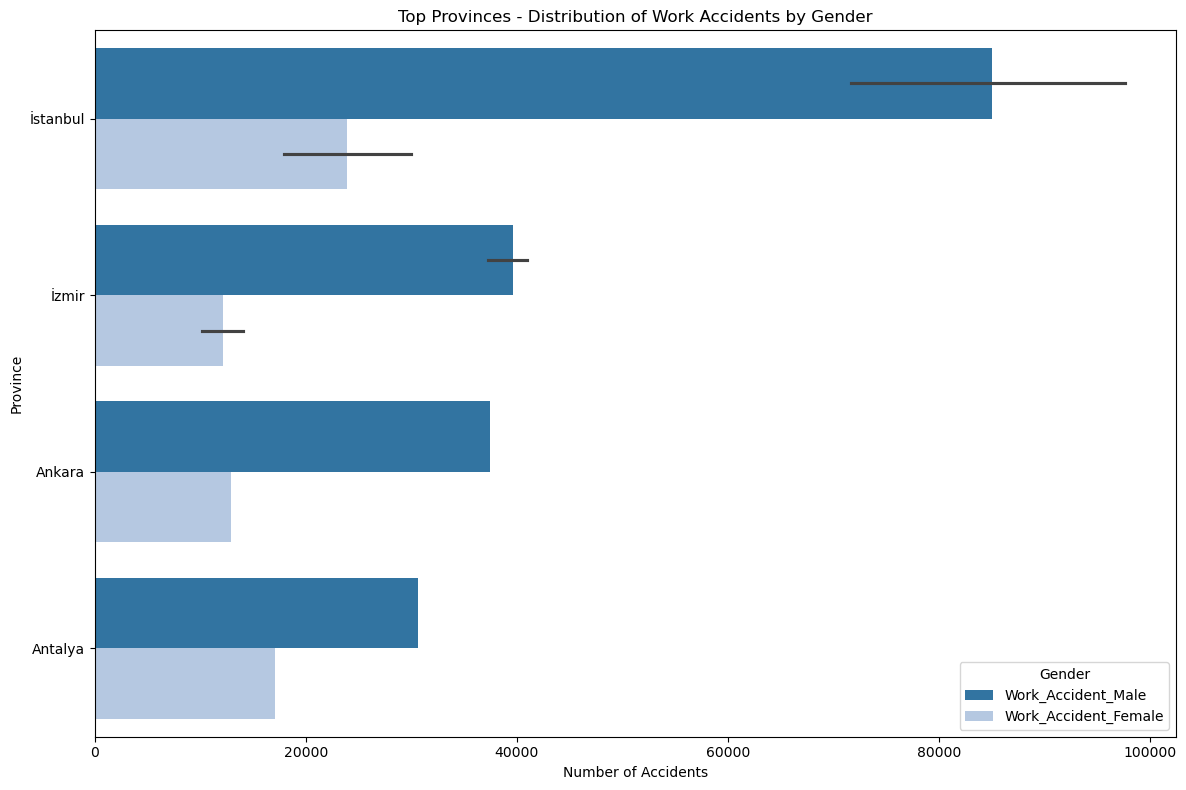

In [27]:
# === Page 2: Accidents by Gender  ===
df_top = top_n(df, "Total_Work_Accidents", 15)
df_plot = df_top.melt(id_vars="Province", value_vars=["Work_Accident_Male","Work_Accident_Female"],
                  var_name="Gender", value_name="Accidents")
plt.figure(figsize=(12,8))
sns.barplot(data=df_plot, x="Accidents", y="Province", hue="Gender",
            palette=["#1f77b4","#aec7e8"])
plt.title("Top Provinces - Distribution of Work Accidents by Gender")
plt.xlabel("Number of Accidents")
plt.ylabel("Province")
plt.tight_layout()
plt.savefig(os.path.join(output_dir,"page2_accidents_by_gender.png"))
plt.show()

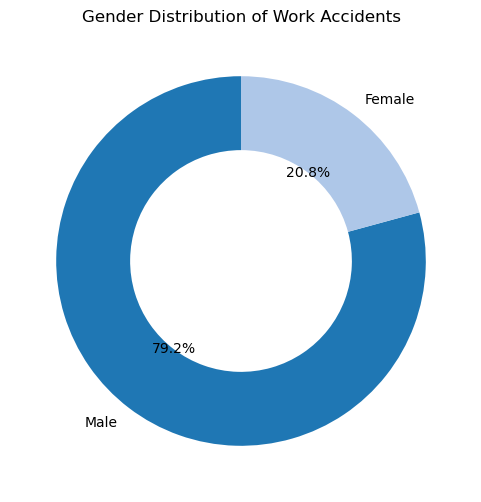

In [12]:
# Donut Chart
plt.figure(figsize=(6,6))
accidents_gender = [df["Work_Accident_Male"].sum(), df["Work_Accident_Female"].sum()]
labels = ["Male","Female"]
colors = ["#1f77b4","#aec7e8"]
plt.pie(accidents_gender, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors, wedgeprops=dict(width=0.4))
plt.title("Gender Distribution of Work Accidents")
plt.savefig(os.path.join(output_dir,"page2_accidents_gender_donut.png"))
plt.show()

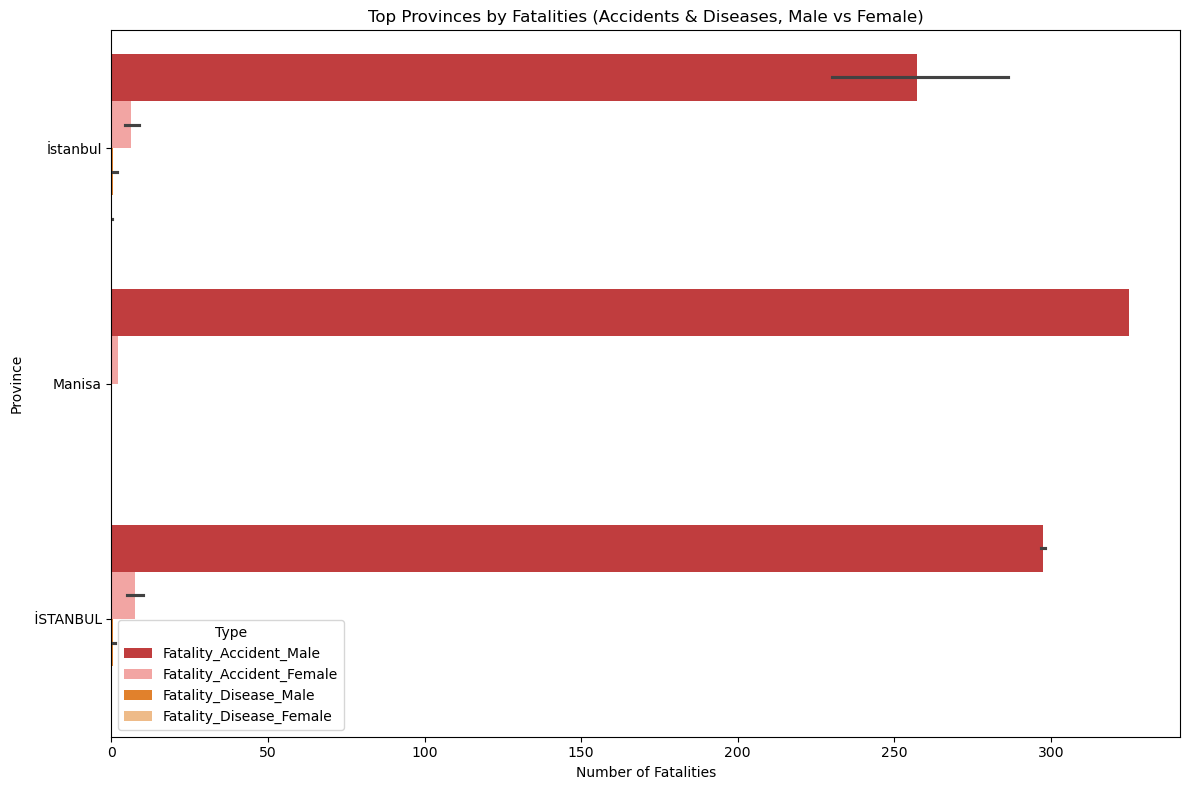

In [28]:
# === Page 3: Fatalities ===
df_top = top_n(df, "Total_Fatalities_Accidents", 15)
df_plot = df_top.melt(id_vars="Province", value_vars=[
    "Fatality_Accident_Male","Fatality_Accident_Female",
    "Fatality_Disease_Male","Fatality_Disease_Female"
], var_name="Type", value_name="Fatalities")
plt.figure(figsize=(12,8))
sns.barplot(data=df_plot, x="Fatalities", y="Province", hue="Type",
            palette=["#d62728","#ff9896","#ff7f0e","#ffbb78"])
plt.title("Top Provinces by Fatalities (Accidents & Diseases, Male vs Female)")
plt.xlabel("Number of Fatalities")
plt.ylabel("Province")
plt.tight_layout()
plt.savefig(os.path.join(output_dir,"page3_fatalities.png"))
plt.show()

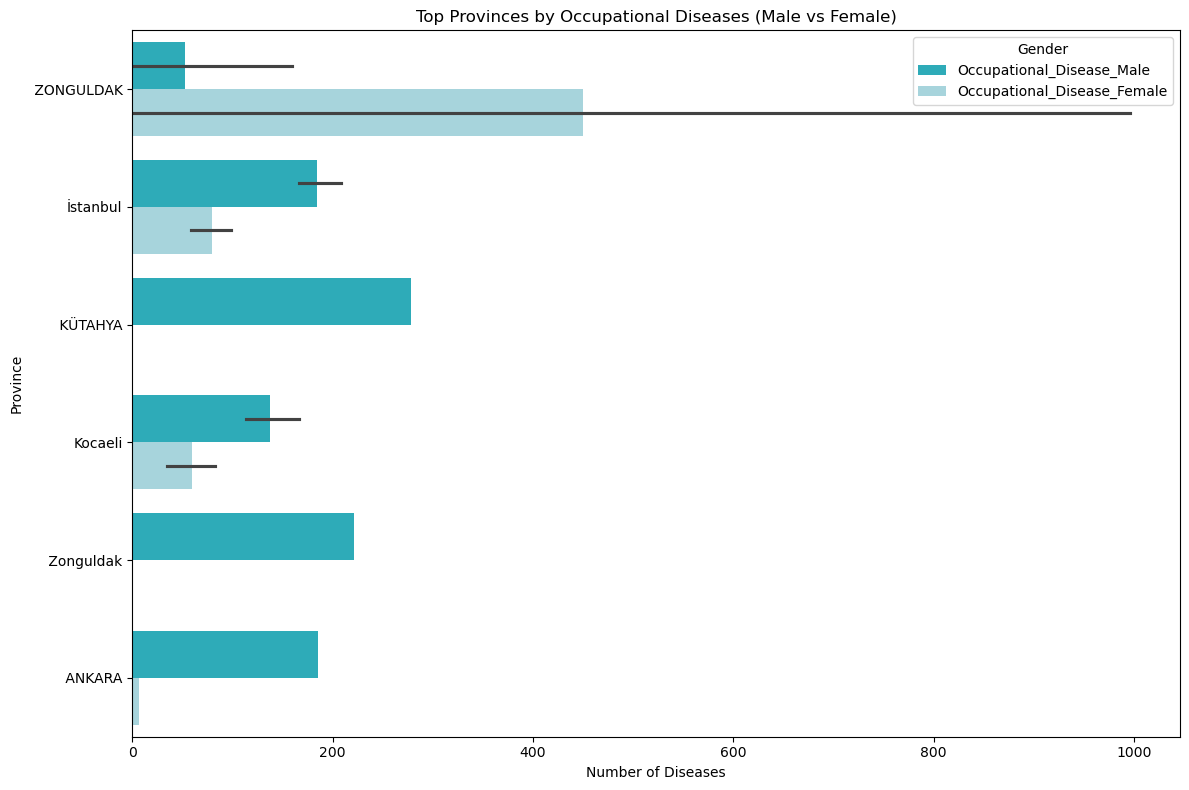

In [29]:
# === Page 4: Occupational Diseases  ===
df_top = top_n(df, "Total_Occupational_Diseases", 15)
df_plot = df_top.melt(id_vars="Province", value_vars=["Occupational_Disease_Male","Occupational_Disease_Female"],
                  var_name="Gender", value_name="Diseases")
plt.figure(figsize=(12,8))
sns.barplot(data=df_plot, x="Diseases", y="Province", hue="Gender",
            palette=["#17becf","#9edae5"])
plt.title("Top Provinces by Occupational Diseases (Male vs Female)")
plt.xlabel("Number of Diseases")
plt.ylabel("Province")
plt.tight_layout()
plt.savefig(os.path.join(output_dir,"page4_occupational_diseases.png"))
plt.show()

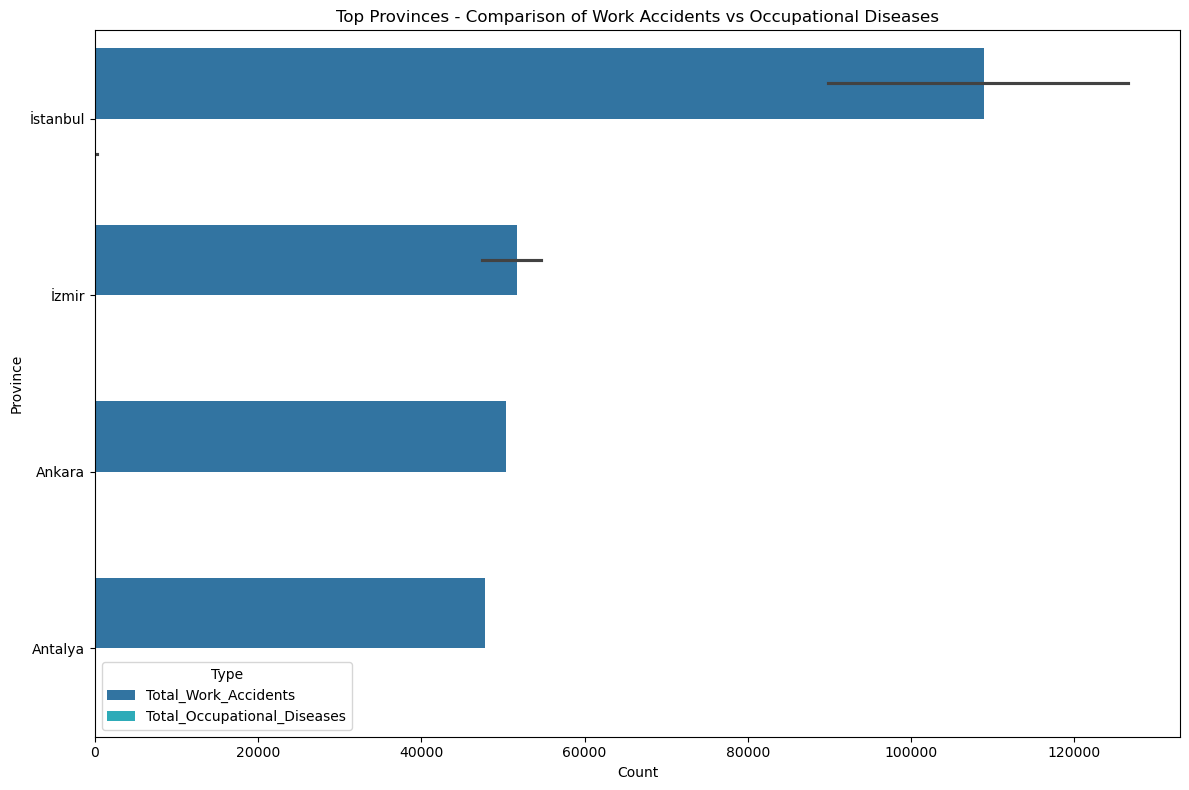

In [30]:
# === Page 5: Province Comparison  ===
df_top = top_n(df, "Total_Work_Accidents", 15)
df_plot = df_top.melt(id_vars="Province", value_vars=["Total_Work_Accidents","Total_Occupational_Diseases"],
                  var_name="Type", value_name="Count")
plt.figure(figsize=(12,8))
sns.barplot(data=df_plot, x="Count", y="Province", hue="Type", palette=["#1f77b4","#17becf"])
plt.title("Top Provinces - Comparison of Work Accidents vs Occupational Diseases")
plt.xlabel("Count")
plt.ylabel("Province")
plt.tight_layout()
plt.savefig(os.path.join(output_dir,"page5_province_comparison.png"))
plt.show()